## This script analysis the zooniverse data so we can appropriatly preprocess the data

In [2]:
import numpy as np
import pandas as pd

In [31]:
def itrDS (dataset):
    done = []
    for index, row in dataset.iterrows():
        row2 = eval(row['subject_data'].replace("null", "'null'"))
        row2 = row2[str(row['subject_ids'])]
        row2 = row2['Filename'].split('.')
        if row2[0] not in done:
            done.append(row2[0])
    return(done)
    

Number of radiographs total: 2526


Number of rows before processing:  22793
Number of images returned by zooniverse before processing:  2508
Number of volunteers before processing:  451


Number of rows after processing:  10789             Num of rows dropped because of empty classifications and labels:  11712             Num of rows dropped because the user did not reach the minimum compleeted classification threshold:  292
Number of images returned by zooniverse before processing:  2477
Number of volunteers after processing:  205
Number of Volunteers Compleetly Removed From the Data:  246


       classification_id      user_name    user_id               user_ip  \
2              351110704         tinong  2341156.0  c2e516961dc59dbca64b   
4              351111038         tinong  2341156.0  c2e516961dc59dbca64b   
5              351111146         tinong  2341156.0  c2e516961dc59dbca64b   
6              351111315         tinong  2341156.0  c2e516961dc59dbca64b   
9              3511

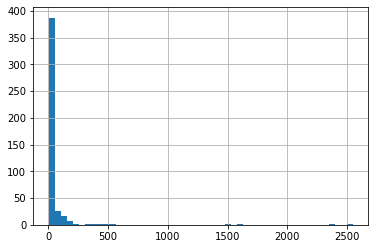

In [42]:
# file path to zooniverse
dataset = pd.read_csv (r'C:\Users\rb01243\OneDrive - University of Surrey\Desktop\zoon data\Labels\dental-disease-labelling-easy-classifications.csv')

# Parameter to choose the minimum number of classifications a volunteer has to complete
minClss = 4


# removes pre-beta test data
dataset = dataset[dataset["workflow_version"] > 20.00].reset_index(drop=True)

# number of images in zooniverse
print('Number of radiographs total: 2526')
print('\n')

# un-processed dataset analysis
print("Number of rows before processing: ", dataset.shape[0])
done = itrDS(dataset)
print('Number of images returned by zooniverse before processing: ', len(done))
print('Number of volunteers before processing: ', dataset['user_name'].value_counts().count())


dataset['user_name'].value_counts().hist(bins=50)

# removes banned users
fle = open("banned.txt", "r")
banedUsers = eval(fle.read())
for bnd in banedUsers:
    dataset2 = dataset[dataset['user_name'] != bnd]
    
    
ds2 = dataset2[dataset2["annotations"].str.contains('"value":null') == False] # removes null bounding boxes
ds2 = ds2[ds2["annotations"].str.contains('"value":\[]') == False] # removes empty classifications

ds3= ds2[ds2.groupby('user_name').user_name.transform('count') >= minClss]


print('\n')
print("Number of rows after processing: ", ds3.shape[0], '            Num of rows dropped because of empty classifications and labels: ', (dataset.shape[0]-ds2.shape[0]), '            Num of rows dropped because the user did not reach the minimum compleeted classification threshold: ', (ds2.shape[0]-ds3.shape[0]))
done = itrDS(ds2)
print('Number of images returned by zooniverse before processing: ', len(done))
print('Number of volunteers after processing: ', ds3['user_name'].value_counts().count())
print('Number of Volunteers Compleetly Removed From the Data: ', (int(dataset['user_name'].value_counts().count()) - int(ds3['user_name'].value_counts().count())))
print('\n')

print(ds3)
dsCount = ds3['user_name'].astype(str)
dsCount = ds3.value_counts()
print(dsCount)
# removes rows with a null value in the annoation column


# removes users with less that the desired number of classifications
#ds2 = ds2[ds2.groupby('user_name').user_name.transform('count') >= minClss]
#ds3= ds2[ds2.groupby('user_name').user_name.transform('count') >= minClss]
#ds3 = ds2['user_name'].astype(str)
#ds3 = ds3.value_counts()
#ds3 = ds3[ds3 >= minClss]




print('Number of volunteers after dropping undesirable rows: ')
    

print("Distribution of annotations per volunteer before removing outlier : ")
#ds3.hist(bins=50)

# remove outlier volunteers that have
#ds4 = ds3[ds3 < 250]
print("Distribution of annotations per volunteer after removing outlier : ")
#ds4.hist(bins=50)

print('mode: ', ds3.mode())
print(ds3.quantile([0.25,0.5,0.75]))